In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('C:\\Users\\LENOVO\\Downloads\\AmesHousing.csv')
dataset

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [3]:
dataset=dataset.drop(['Order','PID'],axis=1)#we removed two columns that we do not need inside our dataset

In [4]:
dataset.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In this dataset, we will try to predict sale price for houses with linear regression. First we look all features, missing values and data types. 

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2930 non-null   int64  
 1   MS Zoning        2930 non-null   object 
 2   Lot Frontage     2440 non-null   float64
 3   Lot Area         2930 non-null   int64  
 4   Street           2930 non-null   object 
 5   Alley            198 non-null    object 
 6   Lot Shape        2930 non-null   object 
 7   Land Contour     2930 non-null   object 
 8   Utilities        2930 non-null   object 
 9   Lot Config       2930 non-null   object 
 10  Land Slope       2930 non-null   object 
 11  Neighborhood     2930 non-null   object 
 12  Condition 1      2930 non-null   object 
 13  Condition 2      2930 non-null   object 
 14  Bldg Type        2930 non-null   object 
 15  House Style      2930 non-null   object 
 16  Overall Qual     2930 non-null   int64  
 17  Overall Cond  

In [17]:
dataset.nunique()#number of unique values for each variable

MS SubClass         16
MS Zoning            7
Lot Frontage       129
Lot Area          1960
Street               2
                  ... 
Mo Sold             12
Yr Sold              5
Sale Type           10
Sale Condition       6
SalePrice_Log     1032
Length: 80, dtype: int64

In [6]:
dataset.isnull().sum()#to check if there is any missing value






MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [7]:
dataset['Lot Frontage'] = dataset['Lot Frontage'].fillna(dataset['Lot Frontage'].mean())
dataset['Alley'] = dataset['Alley'].fillna(dataset['Alley'].mode()[0])
dataset['Mas Vnr Type'] = dataset['Mas Vnr Type'].fillna(dataset['Mas Vnr Type'].mode()[0])
dataset['Mas Vnr Area'] = dataset['Mas Vnr Area'].fillna(dataset['Mas Vnr Area'].mean())
dataset['Bsmt Qual'] = dataset['Bsmt Qual'].fillna(dataset['Bsmt Qual'].mode()[0])
dataset['Bsmt Cond'] = dataset['Bsmt Cond'].fillna(dataset['Bsmt Cond'].mode()[0])
dataset['Bsmt Exposure'] = dataset['Bsmt Exposure'].fillna(dataset['Bsmt Exposure'].mode()[0])
dataset['BsmtFin Type 1'] = dataset['BsmtFin Type 1'].fillna(dataset['BsmtFin Type 1'].mode()[0])
dataset['BsmtFin SF 1'] = dataset['BsmtFin SF 1'].fillna(dataset['BsmtFin SF 1'].mean())
dataset['BsmtFin Type 2'] = dataset['BsmtFin Type 2'].fillna(dataset['BsmtFin Type 2'].mode()[0])
dataset['BsmtFin SF 2'] = dataset['BsmtFin SF 2'].fillna(dataset['BsmtFin SF 2'].mean())
dataset['Bsmt Unf SF'] = dataset['Bsmt Unf SF'].fillna(dataset['Bsmt Unf SF'].mean())
dataset['Total Bsmt SF'] = dataset['Total Bsmt SF'].fillna(dataset['Total Bsmt SF'].mean())
dataset['Electrical'] = dataset['Electrical'].fillna(dataset['Electrical'].mode()[0])
dataset['Bsmt Full Bath'] = dataset['Bsmt Full Bath'].fillna(dataset['Bsmt Full Bath'].mean())
dataset['Bsmt Half Bath'] = dataset['Bsmt Half Bath'].fillna(dataset['Bsmt Half Bath'].mean())
dataset['Fireplace Qu'] = dataset['Fireplace Qu'].fillna(dataset['Fireplace Qu'].mode()[0])
dataset['Garage Type'] = dataset['Garage Type'].fillna(dataset['Garage Type'].mode()[0])
dataset['Garage Yr Blt'] = dataset['Garage Yr Blt'].fillna(dataset['Garage Yr Blt'].mean())
dataset['Garage Finish'] = dataset['Garage Finish'].fillna(dataset['Garage Finish'].mode()[0])
dataset['Garage Cars'] = dataset['Garage Cars'].fillna(dataset['Garage Cars'].mean())
dataset['Garage Area'] = dataset['Garage Area'].fillna(dataset['Garage Area'].mean())
dataset['Garage Qual'] = dataset['Garage Qual'].fillna(dataset['Garage Qual'].mode()[0])
dataset['Garage Cond'] = dataset['Garage Cond'].fillna(dataset['Garage Cond'].mode()[0])
dataset['Pool QC'] = dataset['Pool QC'].fillna(dataset['Pool QC'].mode()[0])
dataset['Fence'] = dataset['Fence'].fillna(dataset['Fence'].mode()[0])
dataset['Misc Feature'] = dataset['Misc Feature'].fillna(dataset['Misc Feature'].mode()[0])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2930 non-null   int64  
 1   MS Zoning        2930 non-null   object 
 2   Lot Frontage     2930 non-null   float64
 3   Lot Area         2930 non-null   int64  
 4   Street           2930 non-null   object 
 5   Alley            2930 non-null   object 
 6   Lot Shape        2930 non-null   object 
 7   Land Contour     2930 non-null   object 
 8   Utilities        2930 non-null   object 
 9   Lot Config       2930 non-null   object 
 10  Land Slope       2930 non-null   object 
 11  Neighborhood     2930 non-null   object 
 12  Condition 1      2930 non-null   object 
 13  Condition 2      2930 non-null   object 
 14  Bldg Type        2930 non-null   object 
 15  House Style      2930 non-null   object 
 16  Overall Qual     2930 non-null   int64  
 17  Overall Cond  

With this code we check for any null values

In [8]:
if(dataset.isnull().sum().sum() != 0):
    print('There is null values')
else:
    print('No null values')

No null values


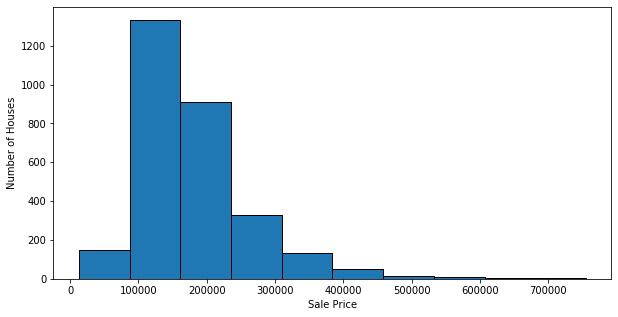

In [9]:
plt.figure(figsize=(10,5))
plt.hist(dataset['SalePrice'],bins=10,edgecolor='black')
plt.xlabel('Sale Price')
plt.ylabel('Number of Houses')
plt.show()

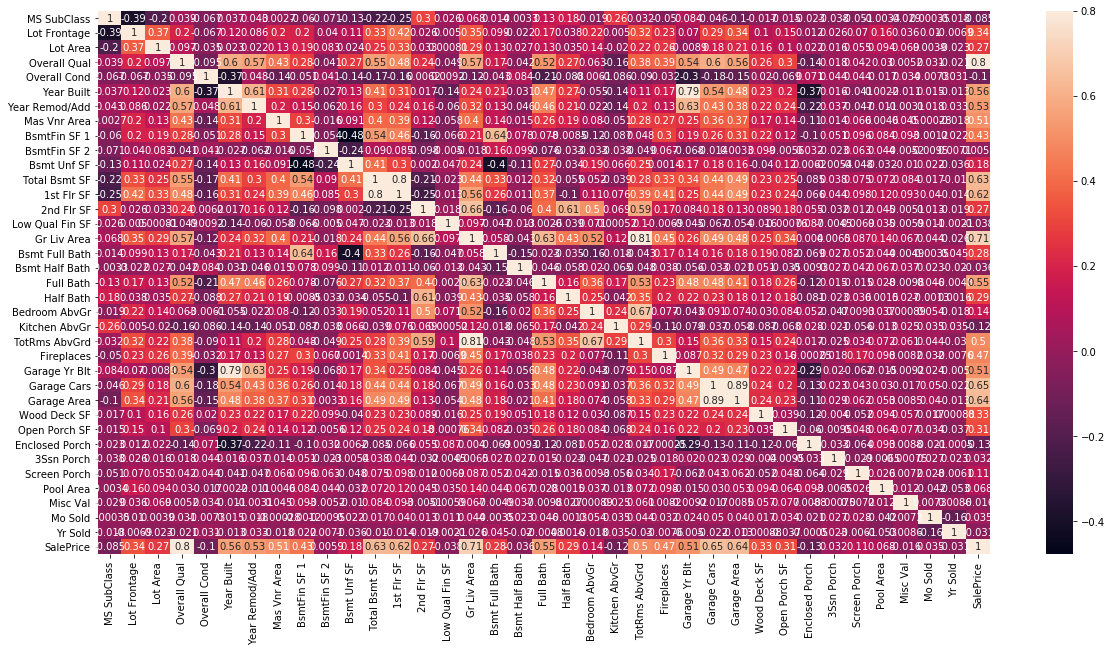

In [10]:
correlation = dataset.corr() #to  relationship analysis.
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, vmax=.8,annot=True);


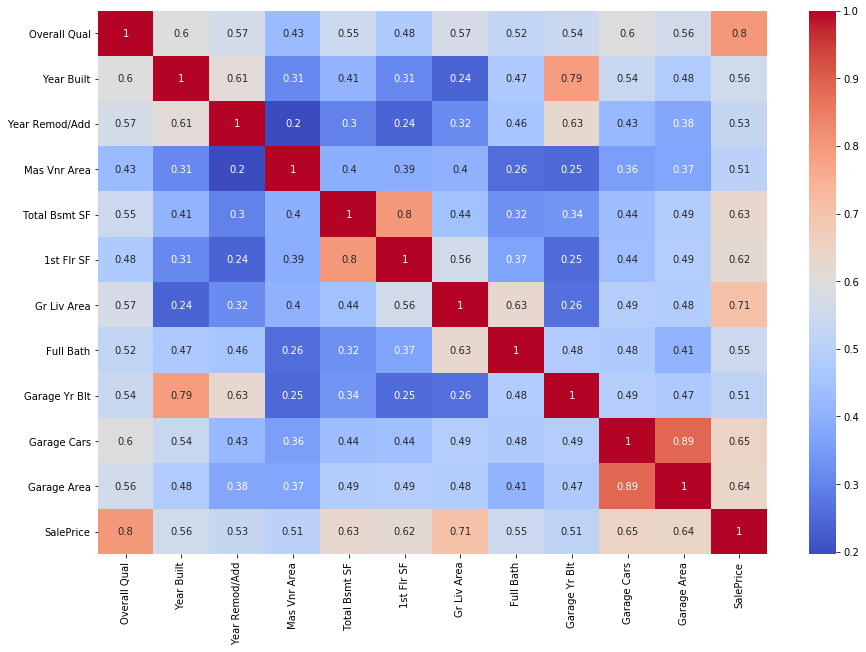

In [11]:
correlation2=dataset.corr()
most_corr=correlation2.index[abs(correlation2["SalePrice"])>0.5]
plt.figure(figsize=(15,10))
g = sns.heatmap(dataset[most_corr].corr(),annot=True,cmap="coolwarm")

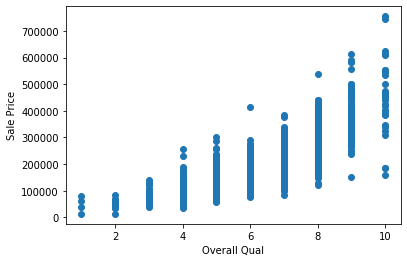

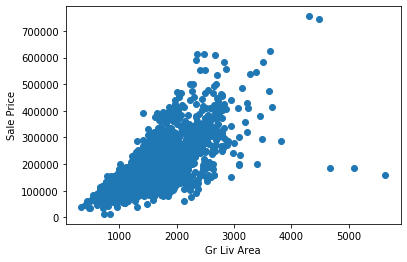

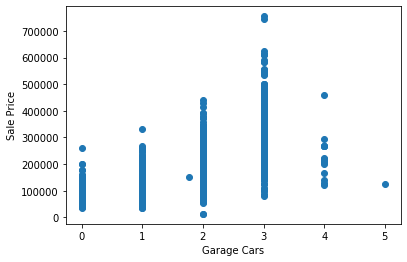

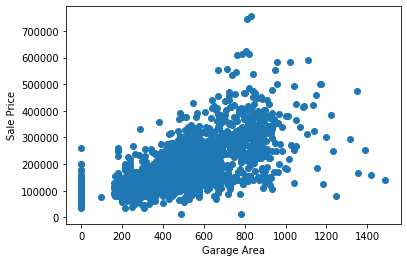

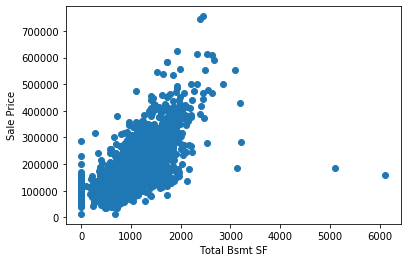

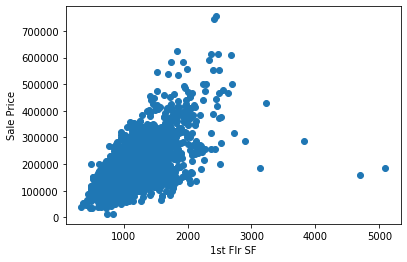

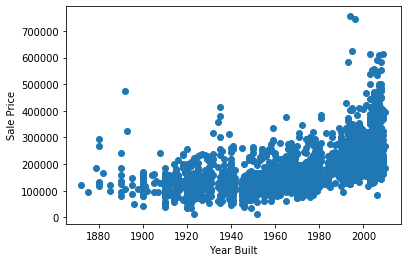

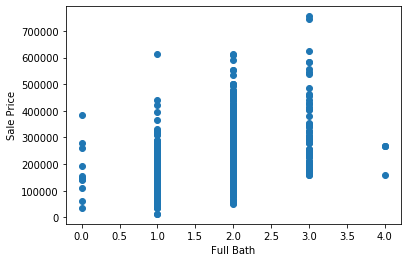

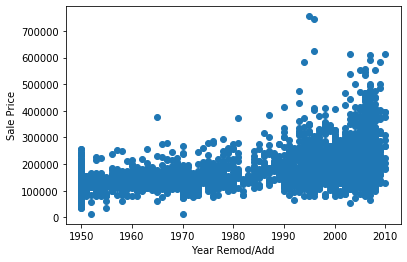

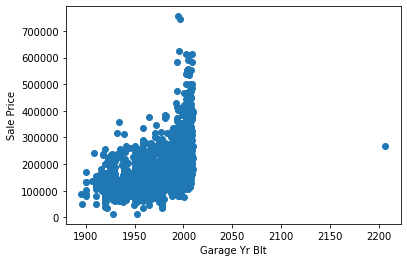

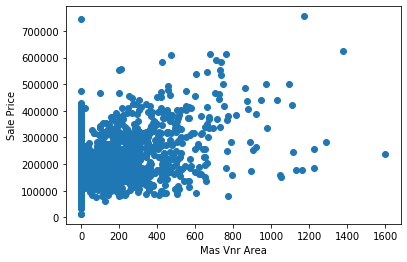

In [12]:
correlated_features=['Overall Qual','Gr Liv Area','Garage Cars','Garage Area','Total Bsmt SF','1st Flr SF','Year Built','Full Bath','Year Remod/Add','Garage Yr Blt','Mas Vnr Area']
for feature in correlated_features:
    plt.scatter(dataset[feature],dataset['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.show()

Skewness: 1.743500
Kurtosis: 5.118900


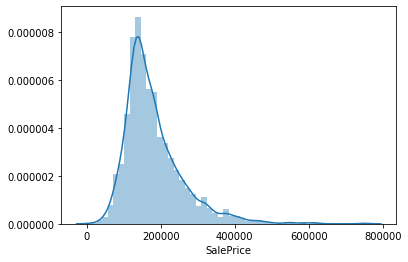

In [13]:
sns.distplot(dataset['SalePrice'])#histogram
#skewness and kurtosis
print("Skewness: %f" % dataset['SalePrice'].skew())
print("Kurtosis: %f" % dataset['SalePrice'].kurt())

Skewness: -0.014793
Kurtosis: 1.513907


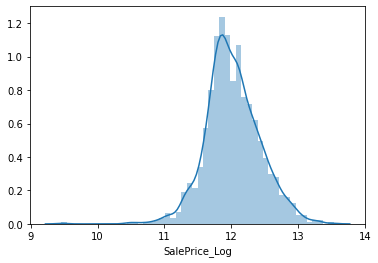

In [15]:
dataset['SalePrice_'] = np.log(dataset['SalePrice'])
sns.distplot(dataset['SalePrice_']);
print("Skewness: %f" % dataset['SalePrice_'].skew())
print("Kurtosis: %f" % dataset['SalePrice_'].kurt())
dataset.drop('SalePrice', axis= 1, inplace=True)